# Homework #1 - Basic Statistics

**In this assignment, you are going to solve some basic statistical problems like estimating parameters of a distribution. In each problem, you are instructed to write little chunks of Python code. Additionally, there are few questions that you have to answer based on your observations and your knowledge of statistics.**

**Ultimately, you are expected to submit your solutions as a single jupyter notebook, *not a python script or anything else.***

**In the case of any questions, post it on the Q&A forum.**

Good Luck

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from dists import *
import scipy.stats as st

# Problem #1 - Parameter Estimation

**A) By calling `my_kappa(n_sample, student_id)`, draw a sample of size 100 from `my_kappa` distribution.**

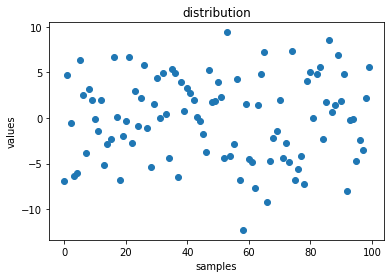

In [4]:
values = my_kappa(100, 810896059)
plt.title("distribution")
plt.xlabel("samples")
plt.ylabel("values")
plt.plot(mk, 'o')
plt.show()

**B) Calculate and print the mean of the sample you've just drawn.**

In [5]:
mean = np.mean(mk)
print('mean= ', mean)

mean=  -0.07262934450724075


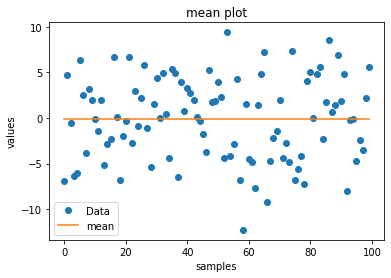

In [6]:
plt.title("mean plot")
plt.xlabel("samples")
plt.ylabel("values")
plt.plot(mk, 'o')

mean = mk.mean()
samples = np.arange(0, 100, 1)

mean_plot = [mean for i in range(100)]
plt.plot(samples, mean_plot)
plt.legend(["Data", "mean"])

plt.show()

**C) Calculate the *unbiased estimation* of the standard deviation of your sample.**

In [7]:
std = np.std(values ,ddof=1)
std

4.4468516163770975

Instead of that, we can calculate std by having (n-1)^1/2 in the denominator. By doing this, we have unbiased estimator of the standard deviation.

**D) Answer the following questions.**
- What is an unbiased estimator?
- In what situations the maximum likelihood estimation of the variance of a distribution can severely contaminate the estimation?


1- It is an accurate statistic that's used to approximate a population parameters so the population parameters are neither an overestimate nor underestimate. By saying “unbiased”, it means the expectation of the estimator equals to the true value, e.g. If E[x] = µ then the mean estimator is unbiased. In this example we added ddof=1 so the estimator is unbiased because it takes sample from our data and calculates the std based on those samples. That makes the calculated std differ from the population std.


2- the bias of the maximum likelihood solution becomes less signiﬁcant as the number N of data points increases, and in the limit N → ∞ the maximum likelihood solution for the variance equals the true variance of the distribution that generated the data.
If the mean is measured relative to the sample mean and not relative to the true mean.

**E) Now, draw 100 samples of size 30 and calculate the mean value for each sample. Draw the histogram of these mean values. Does this histogram resemble any familiar probability distribution function? Why?**

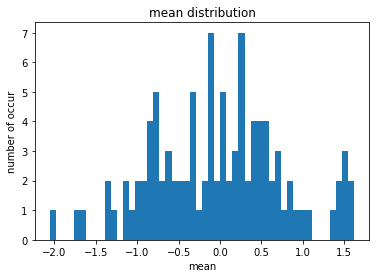

In [106]:
values = [my_kappa(30, 810896059) for i in range (100)]
means = [np.mean(sample) for sample in values]

plt.title("mean distribution")
plt.xlabel("mean")
plt.ylabel("number of occur")
plt.hist(means, bins=50)
plt.show()

I constructed the probability distribution of the sample mean for 100 samples of size 30 drawn from the population with my_kappa distribution.Here the sample mean is approximately normally distributed. When the distribution of the population is normal, then the distribution of the sample mean is also normal.
That's beacause any linear combination of independent normal random variables is also normally distributed. This means that for two independent normal random variables X and Y and any constants a and b, aX + bY will be normally distributed. In the case of the sample mean, the linear combination is  = (1/n)*(X1 + X2 + ... Xn).

# Problem #2 - Confidence Interval

**A) Load slot_machine.csv dataset using pandas package. This file contains the data recorded from playing a slot machine for 1000 rounds. Each row in the dataset contains the outcome for a reel of the machine as well as the amount of prize won at that round.**

In [40]:
df = pd.read_csv("slot_machine.csv")
df

,reel1,reel2,reel3,prize
0,Apple,Apple,Apple,28.762213
1,Orange,Apple,Apple,24.541182
2,Apple,Orange,Apple,19.761514
3,Banana,Orange,Apple,9.161757
4,Orange,Apple,Banana,20.491971
...,...,...,...,...
995,Apple,Orange,Apple,21.116380
996,Orange,Apple,Banana,19.373564
997,Orange,Apple,Banana,19.743847
998,Banana,Orange,Apple,13.347939


**B) Plot the histogram of the prizes won in all rounds.**

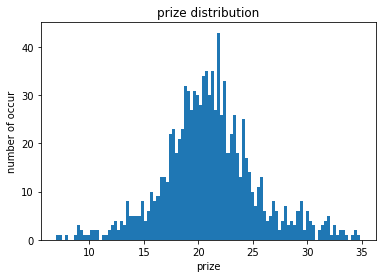

In [28]:
plt.title("prize distribution")
plt.xlabel("prize")
plt.ylabel("number of occur")
plt.hist(df["prize"], 100)
plt.show()

**C) Assuming that the amount of prize won in each round is a Gaussian random variable with different parameters for each combination of outcomes, construct a 95% confidence interval for the rounds that the outcome is *"Banana, Banana, Apple"*.**

In [118]:
df2 = df[(df["reel1"] == "Banana") &
         (df["reel2"] == "Banana") &
         (df["reel3"] == "Apple")]

sampleMean2 = np.mean(df2["prize"])
se2 = st.sem(df2["prize"])
ci2 = st.t.interval(0.95, len(df2)-1 , loc=sampleMean2, scale=se2)
print("mean prize for \"Banana, Banana, Apple\" is: ", sampleMean2)
print("ci2: ", ci2)
print("se2: ", se2)

mean prize for "Banana, Banana, Apple" is:  22.98337224554265
ci2:  (22.049765145511802, 23.9169793455735)
se2:  0.4550118016727621


or in another way we can do this:

In [120]:
c = 0.95
z = st.norm.ppf(c/2 + 0.5)
s = np.std(df2["prize"],ddof=1)
sigma = s / np.sqrt(len(df2))
ci = sigma * z
sample_mean2 = np.mean(df2["prize"])
lower = sample_mean2 - ci
upper = sample_mean2 + ci
print(lower,upper)
print("mean prize for \"Banana, Banana, Apple\" is: ", sampleMean2)


22.091565501723355 23.875178989361945
mean prize for "Banana, Banana, Apple" is:  22.98337224554265


Probability of prize being in (22.091565501723355, 23.875178989361945) for the rounds that the outcome is *"Banana, Banana, Apple"  is 95%.

**D) Now, repeat the procedure in part C for *"Orange, Orange, Orange"* and *"Orange, Apple, Banana".***

In [113]:
df3 = df[(df["reel1"] == "Orange") &
         (df["reel2"] == "Orange") &
         (df["reel3"] == "Orange")]

c = 0.95
z = st.norm.ppf(c/2 + 0.5)
s = np.std(df3["prize"],ddof=1)
sigma = s / np.sqrt(len(df3))
ci = sigma * z
sample_mean3 = np.mean(df3["prize"])
lower = sample_mean3 - ci
upper = sample_mean3 + ci

print(lower,upper)
print("mean prize for \"Orange, Orange, Orange\" is: ", sampleMean3)

26.631292858399476 27.682269564388697
mean prize for "Orange, Orange, Orange" is:  27.156781211394087


Probability of prize being in (26.631292858399476, 27.682269564388697) for the rounds that the outcome is "Orange, Orange, Orange"  is 95%.

In [115]:
df4 = df[(df["reel1"] == "Orange") &
         (df["reel2"] == "Apple") &
         (df["reel3"] == "Banana")]

c = 0.95
z = st.norm.ppf(c/2 + 0.5)
s = np.std(df4["prize"],ddof=1)
sigma = s / np.sqrt(len(df4))
ci = sigma * z
sample_mean4 = np.mean(df4["prize"])
lower = sample_mean4 - ci
upper = sample_mean4 + ci

print(lower,upper)
print("mean prize for \"Orange, Apple, Banana\" is: ", sampleMean4)

16.215085506417765 18.161192047241002
mean prize for "Orange, Apple, Banana" is:  17.188138776829383


Probability of prize being in(16.215085506417765, 18.161192047241002) for the rounds that the outcome is "Orange, Apple, Banana"  is 95%.

**D) Answer the following questions.**
- What is a confidenve interval?
- Interpret the results of part C. What does the computed confidence interval mean?
- Is there any noticable difference between the average prize for "Banana, Banana, Apple" and "Oragne, Orange, Orange"? Why?
- Is there any noticable difference between the average prize for "Orange, Orange, Orange" and "Oragne, Apple, Banana"? Why?

 
 
1- Confidence interval refers to the probability that a population parameter will fall between a set of values for a certain proportion of times. 

2- mentioned in part C.
  
3- average prize for "Banana, Banana, Apple" is 22.98 and average prize for "Oragne, Orange, Orange" is 27.15 that means on average "Oragne, Orange, Orange" has more prize beacause it's harder to get three Oranges in a row. In other words probability of get three Orange is smaller than "Banana, Banana, Apple".
  
4- the same thing happens for these two rounds. Average prize for "Orange, Orange, Orange" is 27.15 and average prize for "Oragne, Apple, Banana" is 17.18 which is so much lower.

# Problem #3 - Estimating The Parameters of Some Observations

**In this problem, you're going to estimate the average value of a random variable. In contrast with previous problems, you are going to estimate that value over time. To observe a single realization of this random variable, call `my_normal(student_id)` function. Upon calling this function, a single observation/realization of this random variable is returned.**

**A) Draw 100 samples from my_omicron distribution. After observing each realization, calculate the sample mean of the realizations you've observed so far. In addition to that, construct a confidence interval for your estimation at 0.1 significane level. Finally, plot your estimations in a bar plot alongside their confidence errors as whisckers of each bar. Your final plot should be similar to this:**

<img src="https://support.content.office.net/en-us/media/68efe29e-f30c-4c6f-95cf-9cff7dde1131.jpg" width="400px" alt="no internet connection!">

/home/linux/.local/lib/python3.8/site-packages/numpy/core/_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/linux/.local/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


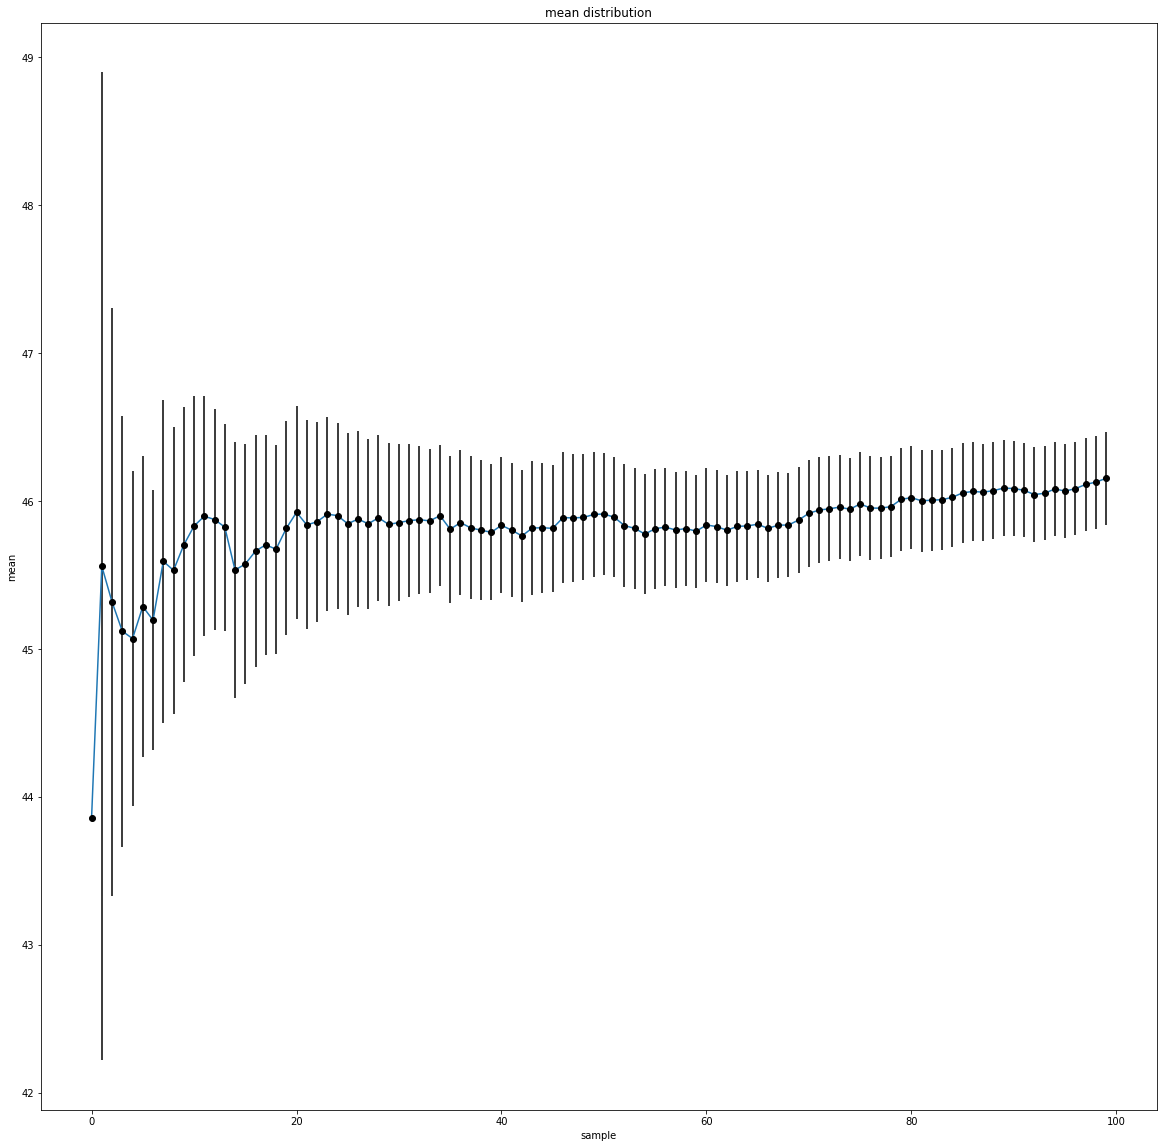

In [101]:
c = 0.95
samples = []
samples_means = []
errors = []

for i in range(100):
    sample = my_normal(810896059)
    samples.append(sample)
    samples_mean = np.mean(samples)
    samples_means.append(samples_mean)
    z = st.norm.ppf(c / 2 + 0.5)
    s = np.std(samples, ddof=1)
    sigma = s / np.sqrt(len(samples))
    ci = sigma * z
    errors.append(ci)

x = np.arange(0, 100)
plt.figure(figsize=(20, 20))
plt.title("mean distribution")
plt.xlabel("sample")
plt.ylabel("mean")
plt.plot(x, samples_means)
plt.errorbar(x, samples_means, yerr=errors, fmt='o', color='black')
plt.show()

**B) How is your estimation changing over time? How is your confidence interval changing? Explain why.**

Over time we have more sample from the population, and by having more sample the estimation of mean is much more accurate and the confidence interval is smaller. That means there is a higher chance that the real mean of population or the mean of new sample is in the cnfidence interval around the estimated mean.
for calculation of std, there is sqrt(number of sample) in the denominator. So larger std makes the confidence interval smaller and the estimation is more accurate.

In [121]:
import os
os.system('jupyter nbconvert --to html HW1_sepidehfatemi_810896059.ipynb')

0